#### Tasks To Be Performed:

1. Perform a Detailed EDA for the Data with inferences from each of the actions.


2. Using Statistical Analysis, find out statistical evidence for the following:

    a. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?
    
    b. It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?
    
    c. Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?"
    
    d. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

# 1) EDA

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("purchase_data.csv")

In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [6]:
data.info() #check if all the data is in correct dt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [7]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [8]:
# Changing values for all 4+
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].replace("4+","4")

In [9]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0', nan], dtype=object)

In [10]:
data["Stay_In_Current_City_Years"] = pd.to_numeric(data["Stay_In_Current_City_Years"], errors="coerce")

In [11]:
data.info() #check if all the data is in correct dt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  float64
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 24.1+ MB


In [13]:
# chk missing values - drop or impute
data.isnull().sum()

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             81514
Product_Category_3            182433
Purchase                           1
dtype: int64

In [15]:
data.shape

(263015, 12)

In [18]:
# dropping all null values
data = data.dropna()

In [19]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [20]:
data.shape

(80582, 12)

In [21]:
# Feature encoding : label encoder for converting category to a numeric value 1) for gender

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
data["Gender"] = le.fit_transform(data['Gender'])
print("Gender", le.classes_)

Gender ['F' 'M']


In [24]:
data["Gender"].unique()

array([0, 1])

In [28]:
# to chk which one got the label value
dict(zip(le.classes_, le.fit_transform(le.classes_)))

{'F': 0, 'M': 1}

In [29]:
# for user id
data["User_ID"] = le.fit_transform(data['User_ID'])
print("User_ID", le.classes_)
dict(zip(le.classes_, le.fit_transform(le.classes_)))

User_ID [1000001 1000002 1000003 ... 1006038 1006039 1006040]


{1000001: 0,
 1000002: 1,
 1000003: 2,
 1000004: 3,
 1000005: 4,
 1000006: 5,
 1000007: 6,
 1000008: 7,
 1000009: 8,
 1000010: 9,
 1000011: 10,
 1000013: 11,
 1000014: 12,
 1000015: 13,
 1000016: 14,
 1000017: 15,
 1000018: 16,
 1000019: 17,
 1000020: 18,
 1000021: 19,
 1000022: 20,
 1000023: 21,
 1000024: 22,
 1000025: 23,
 1000026: 24,
 1000027: 25,
 1000028: 26,
 1000029: 27,
 1000030: 28,
 1000031: 29,
 1000032: 30,
 1000033: 31,
 1000034: 32,
 1000035: 33,
 1000036: 34,
 1000037: 35,
 1000039: 36,
 1000041: 37,
 1000042: 38,
 1000043: 39,
 1000044: 40,
 1000045: 41,
 1000046: 42,
 1000047: 43,
 1000048: 44,
 1000049: 45,
 1000050: 46,
 1000051: 47,
 1000052: 48,
 1000053: 49,
 1000054: 50,
 1000055: 51,
 1000056: 52,
 1000057: 53,
 1000058: 54,
 1000059: 55,
 1000060: 56,
 1000061: 57,
 1000062: 58,
 1000063: 59,
 1000064: 60,
 1000065: 61,
 1000066: 62,
 1000067: 63,
 1000068: 64,
 1000069: 65,
 1000070: 66,
 1000071: 67,
 1000072: 68,
 1000073: 69,
 1000074: 70,
 1000075: 71,
 1

In [30]:
# for product id
data["Product_ID"] = le.fit_transform(data['Product_ID'])
print("Product_ID", le.classes_)
dict(zip(le.classes_, le.fit_transform(le.classes_)))

Product_ID ['P00000142' 'P00000242' 'P00000642' 'P00001042' 'P00001142' 'P00001542'
 'P00002142' 'P00002242' 'P00003442' 'P00004242' 'P00004842' 'P00005542'
 'P00005942' 'P00006942' 'P00008042' 'P00010542' 'P00010742' 'P00010942'
 'P00011942' 'P00012242' 'P00014442' 'P00014642' 'P00014842' 'P00015542'
 'P00015642' 'P00015842' 'P00015942' 'P00016342' 'P00016442' 'P00016542'
 'P00016742' 'P00016842' 'P00019042' 'P00019342' 'P00021842' 'P00023342'
 'P00024142' 'P00025242' 'P00025342' 'P00025442' 'P00026042' 'P00028442'
 'P00028542' 'P00029542' 'P00030842' 'P00030942' 'P00031842' 'P00032042'
 'P00034042' 'P00034142' 'P00034242' 'P00034442' 'P00034742' 'P00035042'
 'P00035342' 'P00035542' 'P00035842' 'P00035942' 'P00036842' 'P00037142'
 'P00038042' 'P00038142' 'P00041342' 'P00041442' 'P00042142' 'P00043842'
 'P00044242' 'P00045042' 'P00045142' 'P00045242' 'P00045342' 'P00046742'
 'P00048042' 'P00048342' 'P00050042' 'P00050342' 'P00050442' 'P00051942'
 'P00053042' 'P00053342' 'P00053442' 'P0

{'P00000142': 0,
 'P00000242': 1,
 'P00000642': 2,
 'P00001042': 3,
 'P00001142': 4,
 'P00001542': 5,
 'P00002142': 6,
 'P00002242': 7,
 'P00003442': 8,
 'P00004242': 9,
 'P00004842': 10,
 'P00005542': 11,
 'P00005942': 12,
 'P00006942': 13,
 'P00008042': 14,
 'P00010542': 15,
 'P00010742': 16,
 'P00010942': 17,
 'P00011942': 18,
 'P00012242': 19,
 'P00014442': 20,
 'P00014642': 21,
 'P00014842': 22,
 'P00015542': 23,
 'P00015642': 24,
 'P00015842': 25,
 'P00015942': 26,
 'P00016342': 27,
 'P00016442': 28,
 'P00016542': 29,
 'P00016742': 30,
 'P00016842': 31,
 'P00019042': 32,
 'P00019342': 33,
 'P00021842': 34,
 'P00023342': 35,
 'P00024142': 36,
 'P00025242': 37,
 'P00025342': 38,
 'P00025442': 39,
 'P00026042': 40,
 'P00028442': 41,
 'P00028542': 42,
 'P00029542': 43,
 'P00030842': 44,
 'P00030942': 45,
 'P00031842': 46,
 'P00032042': 47,
 'P00034042': 48,
 'P00034142': 49,
 'P00034242': 50,
 'P00034442': 51,
 'P00034742': 52,
 'P00035042': 53,
 'P00035342': 54,
 'P00035542': 55,
 '

In [31]:
# for user age
data["Age"] = le.fit_transform(data['Age'])
print("Age", le.classes_)
dict(zip(le.classes_, le.fit_transform(le.classes_)))

Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']


{'0-17': 0,
 '18-25': 1,
 '26-35': 2,
 '36-45': 3,
 '46-50': 4,
 '51-55': 5,
 '55+': 6}

In [32]:
# for City_Category
data["City_Category"] = le.fit_transform(data['City_Category'])
print("City_Category", le.classes_)
dict(zip(le.classes_, le.fit_transform(le.classes_)))

City_Category ['A' 'B' 'C']


{'A': 0, 'B': 1, 'C': 2}

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80582 entries, 1 to 263011
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  int32  
 2   Gender                      80582 non-null  int32  
 3   Age                         80582 non-null  int32  
 4   Occupation                  80582 non-null  float64
 5   City_Category               80582 non-null  int32  
 6   Stay_In_Current_City_Years  80582 non-null  float64
 7   Marital_Status              80582 non-null  float64
 8   Product_Category_1          80582 non-null  float64
 9   Product_Category_2          80582 non-null  float64
 10  Product_Category_3          80582 non-null  float64
 11  Purchase                    80582 non-null  float64
dtypes: float64(7), int32(4), int64(1)
memory usage: 6.8 MB


In [34]:
# use for loop for all object data
# for i in data.colums:
#      if column_name.dtype == "object"
#      le.fit_tranform()

## Statistical Summary

###### 5 number summary - min q1=25% q2=50% q3=75% max 

In [35]:
data.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000
mean,2785.306930,229.309585,0.776216,2.451540,8.173426,1.087513,1.860775,0.401752,2.738366,6.892085,12.658298,11628.183279
std,1610.765451,144.593979,0.416782,1.338429,6.487913,0.758965,1.285501,0.490255,2.563225,4.498417,4.129156,5069.515441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1387.000000,110.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7868.000000
50%,2828.000000,206.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11744.500000
75%,4092.000000,351.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15610.000000
max,5696.000000,524.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23958.000000


### Visualization

In [37]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,391,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,3,284,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,4,211,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
14,5,363,0,5,9.0,0,1.0,0.0,5.0,8.0,14.0,5378.0
16,5,517,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0


##### 1) checking if male / female purchase more

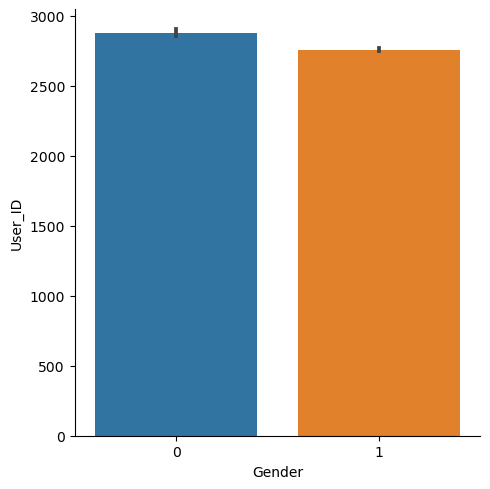

In [39]:
# bar plot with category plot
sns.catplot(x="Gender", y="User_ID", data = data, kind="bar")

In [41]:
# Among all the purchases, it is observed that females purchase more than males

##### 2)Check which age group purchased more?

{'0-17': 0,
 '18-25': 1,
 '26-35': 2,
 '36-45': 3,
 '46-50': 4,
 '51-55': 5,
 '55+': 6}

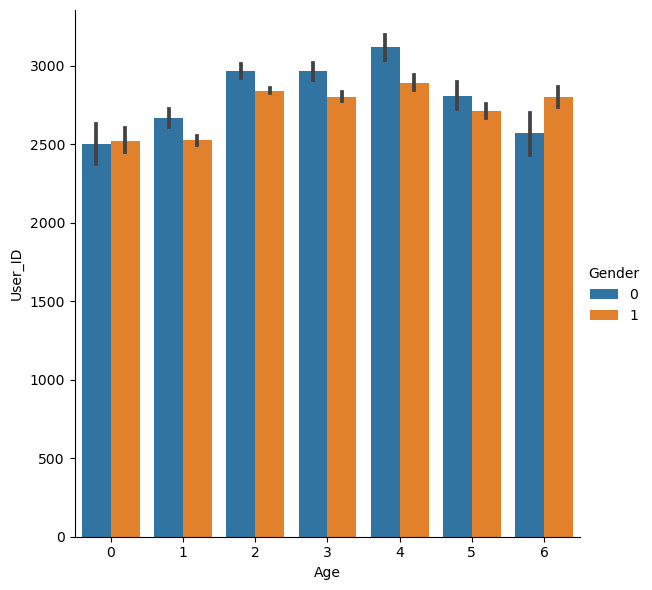

In [44]:
# histogram with category plot
sns.catplot(x="Age", y="User_ID", hue="Gender", data = data, kind="bar", height=6)

In [46]:
# Analysis 1 : age group of 46-50 spent highest
#          2 : women purchase more than male compartatively irespective of age

#### Married or unmarried vs female or male

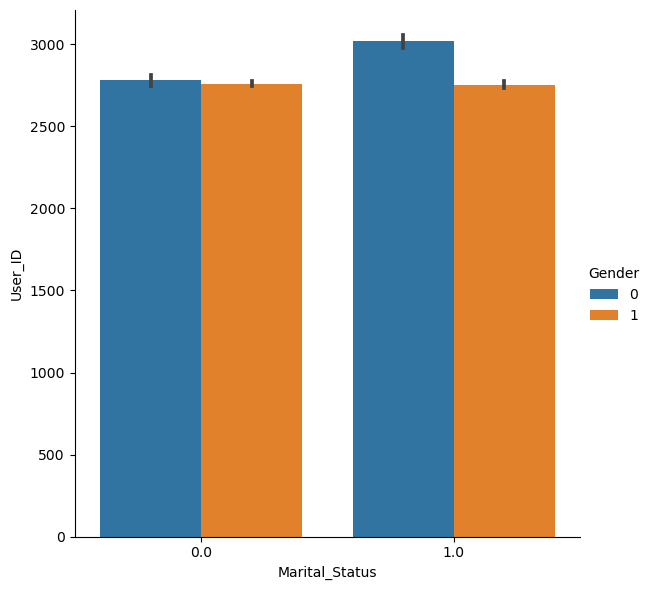

In [47]:
# histogram with category plot
sns.catplot(x="Marital_Status", y="User_ID", hue="Gender", data = data, kind="bar", height=6, legend=True, legend_out=True)

In [48]:
# the gender ratio in unmarried customers is almost similar, whereas the married customers have a sightly higher number of females in the lot.

#### Analysis frequency of product category 1

<Axes: xlabel='Product_Category_1', ylabel='count'>

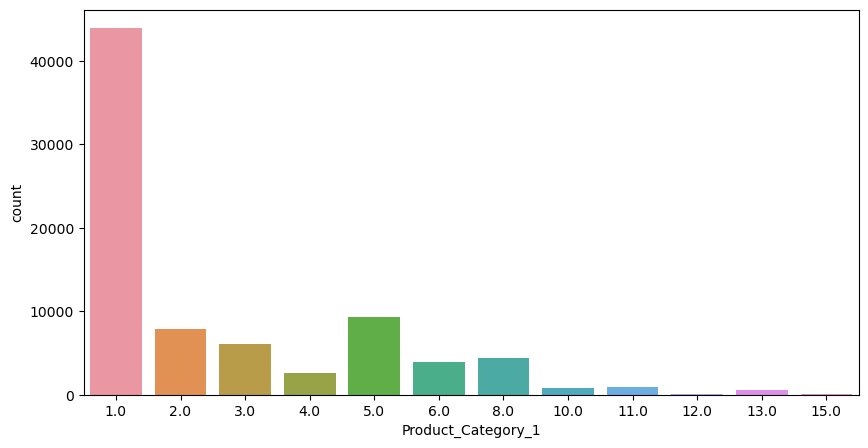

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x = data['Product_Category_1'])

In [50]:
### The product_category_1 sees a great rise of product category 1 and diminishes with the other products. The other considerable categories are 5, 2, 3, 6, 8, etc.

<Axes: xlabel='Product_Category_2', ylabel='count'>

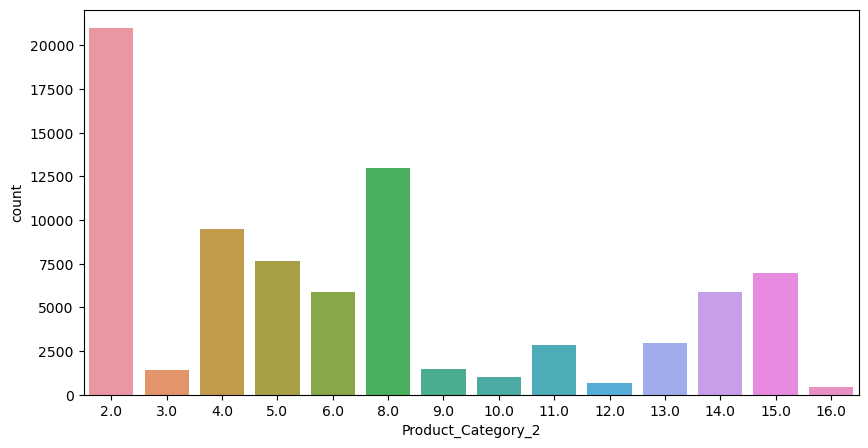

In [51]:
#Now let us analysis frequency of product category 2

plt.figure(figsize=(10,5))
sns.countplot(x = data['Product_Category_2'])

<Axes: xlabel='Product_Category_3', ylabel='count'>

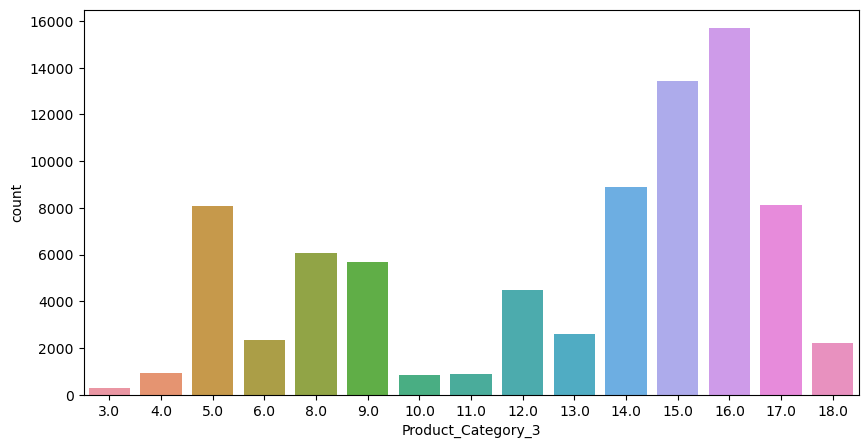

In [52]:
#Now let us analysis frequency of product category 3

plt.figure(figsize=(10,5))
sns.countplot(x = data['Product_Category_3'])

## Statistics

#### Using Statistical Analysis, Find out statistical evidence for the following:

a. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

In [53]:
# Z or T test (based on sample size) ; one sample

In [54]:
# Null Hypothesis - Mean = 10000
# Alt Hypothesis - Mean != 10000

In [56]:
# 18-25 Men
new_data = data.loc[(data['Age']==1) & data['Gender']==1]
new_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
98,20,487,1,1,15.0,0,4.0,0.0,1.0,8.0,17.0,12099.0
103,20,402,1,1,15.0,0,4.0,0.0,1.0,11.0,16.0,12098.0
111,20,358,1,1,15.0,0,4.0,0.0,2.0,4.0,15.0,9564.0
127,23,332,1,1,4.0,2,4.0,0.0,1.0,5.0,9.0,15361.0
128,23,71,1,1,4.0,2,4.0,0.0,1.0,2.0,15.0,15770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262758,4206,180,1,1,18.0,1,1.0,1.0,1.0,2.0,15.0,11512.0
262759,4206,394,1,1,18.0,1,1.0,1.0,1.0,15.0,18.0,11521.0
262760,4206,23,1,1,18.0,1,1.0,1.0,1.0,2.0,13.0,3988.0
262764,4206,75,1,1,18.0,1,1.0,1.0,5.0,8.0,17.0,5444.0


In [57]:
new_data.shape

(11904, 12)

In [58]:
sample_size = 25
sample = new_data.sample(sample_size, random_state=0)
sample #Random data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
124490,1147,184,1,1,0.0,1,1.0,0.0,1.0,2.0,5.0,7943.0
66720,3989,6,1,1,4.0,1,2.0,0.0,1.0,5.0,8.0,15811.0
194073,5622,418,1,1,5.0,1,1.0,0.0,2.0,3.0,10.0,12882.0
157342,290,262,1,1,4.0,1,4.0,0.0,13.0,15.0,16.0,570.0
199012,698,411,1,1,0.0,2,1.0,0.0,1.0,2.0,15.0,11519.0
177264,3260,71,1,1,0.0,0,1.0,1.0,1.0,2.0,15.0,15247.0
87575,1413,191,1,1,4.0,0,2.0,0.0,1.0,14.0,17.0,15719.0
134780,2664,378,1,1,4.0,2,3.0,0.0,1.0,2.0,11.0,15164.0
99107,3186,341,1,1,4.0,0,1.0,0.0,3.0,4.0,5.0,8282.0
236737,502,138,1,1,0.0,0,0.0,0.0,1.0,2.0,15.0,11548.0


In [59]:
pop_mean = 10000

In [66]:
from scipy.stats import ttest_1samp
print(ttest_1samp(sample['Purchase'], pop_mean))

TtestResult(statistic=0.8445539429218184, pvalue=0.40670035836140106, df=24)


In [67]:
# p > 0.05 so null hypothesis is accepted. The mean purchase is 10000

#### b. It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?

In [ ]:
# % so Z test. one sample test for proportion

In [69]:
#null hypothesis - proportion is 35%.
#alternate hypothesis - proportion is not 35%.

data_new = data.loc[(data['Purchase'] > 10000)]

In [70]:
count = data_new['Gender'].value_counts()[0] #no of female

In [71]:
nobs = len(data_new['Gender']) #no of obervations m+f

In [72]:
p0 = 0.35 #given

In [73]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(count=count, nobs=nobs, value=p0, 
                  alternative="two-sided", prop_var=False)

(-79.12020590883206, 0.0)

In [74]:
#p-value is less than 0.05, reject the null hypothesis.
#the proportion of women spending more than 10000, is not 35%.

#### c. Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?"

In [ ]:
# Variance so F test

In [94]:
#null hypothesis - variances are same
#alternate hypothesis - variances are different

data_18_25 = data[(data['Age'] == 1)]

In [97]:
purchase_men = data_18_25[data_18_25['Gender'] == 1]['Purchase']
purchase_women = data_18_25[data_18_25['Gender'] == 0]['Purchase']

In [98]:
from scipy.stats import f_oneway
f_oneway(purchase_men, purchase_women)

F_onewayResult(statistic=128.11711123738277, pvalue=1.3868351522876563e-29)

In [ ]:
# p>0.05 so accept h0

#### d. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

In [78]:
# % so Z test. 2 sample test for proportion

In [77]:
#null hypothesis - proportion is same.
#alternate hypothesis - proportion is not same.

In [85]:
# Create a subset for ages 18-25
data_18_25 = data[(data['Age'] == 1)]

# Create a subset for ages 26-35
data_26_35 = data[(data['Age'] == 2)]

In [89]:
# Calculate the proportions of men who have spent more than $10,000 for each subset
prop_18_25 = len(data_18_25[(data_18_25['Gender'] == '1') & (data_18_25['Purchase'] > 10000)]) / len(data_18_25)

prop_26_35 = len(data_26_35[(data_26_35['Gender'] == '1') & (data_26_35['Purchase'] > 10000)]) / len(data_26_35)

In [90]:
count_18_25 = data_18_25['Gender'].value_counts()[1]
count_26_35 = data_26_35['Gender'].value_counts()[1]

nobs_18_25 = len(data_18_25)
nobs_26_35 = len(data_26_35)

In [92]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest([count_18_25, count_26_35], [nobs_18_25, nobs_26_35])

(-5.284183773323873, 1.262664508840699e-07)

In [93]:
#p-value is greater than 0.05, accept the null hypothesis.
#the proportion of men spending more than 10000, is the same for ages.